In [4]:
import pandas as pd

file_path = 'imdb_movie_dataset.csv'
imdb_data = pd.read_csv(file_path)

print(imdb_data.head())
print(imdb_data.info())
print(imdb_data.describe())


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [7]:
import pandas as pd

file_path = 'imdb_movie_dataset.csv'
imdb_data = pd.read_csv(file_path)

print(imdb_data.columns)
imdb_data = imdb_data.dropna(subset=['Series_Title', 'Released_Year', 'IMDB_Rating'])

imdb_data['Released_Year'] = pd.to_numeric(imdb_data['Released_Year'], errors='coerce')
imdb_data['IMDB_Rating'] = pd.to_numeric(imdb_data['IMDB_Rating'], errors='coerce')
print(imdb_data.head())

expected_columns = ['Meta_score', 'No_of_Votes', 'Gross']
missing_columns = [col for col in expected_columns if col not in imdb_data.columns]
if missing_columns:
    print(f"Warning: The following expected columns are missing from the dataset: {missing_columns}")

if 'Meta_score' in imdb_data.columns:
    imdb_data['Meta_score'] = pd.to_numeric(imdb_data['Meta_score'], errors='coerce')
if 'No_of_Votes' in imdb_data.columns:
    imdb_data['No_of_Votes'] = pd.to_numeric(imdb_data['No_of_Votes'], errors='coerce')
if 'Gross' in imdb_data.columns:
    imdb_data['Gross'] = imdb_data['Gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

print(imdb_data.info())


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption         1994.0           A  142 min   
1             The Godfather         1972.0           A  175 min   
2           The Dark Knight         2008.0          UA  152 min   
3    The Godfather: Part II         1974.0           A  202 min   
4              12 Angry Men         1957.0           U   96 min   

                  Ge

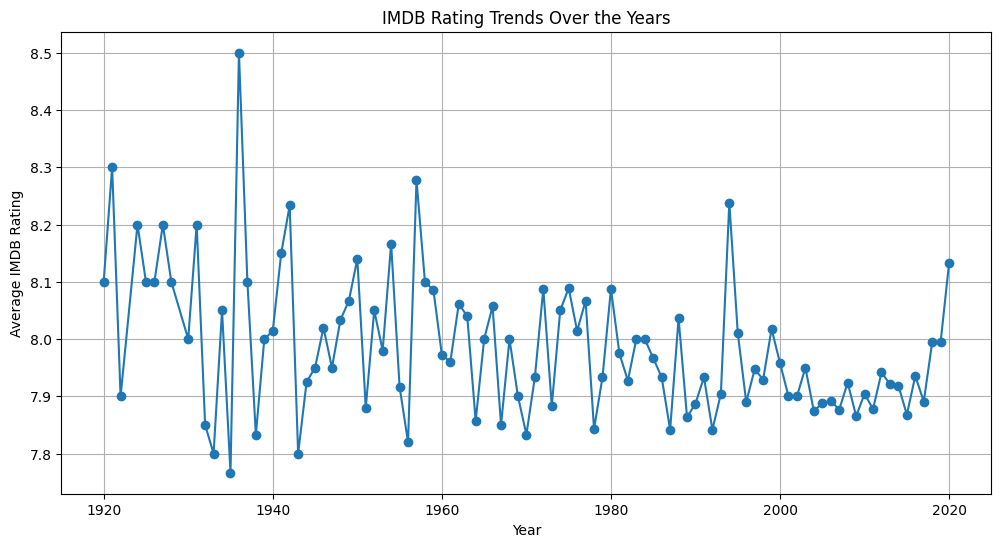

In [8]:
import matplotlib.pyplot as plt

rating_trends = imdb_data.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(rating_trends['Released_Year'], rating_trends['IMDB_Rating'], marker='o')
plt.title('IMDB Rating Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()


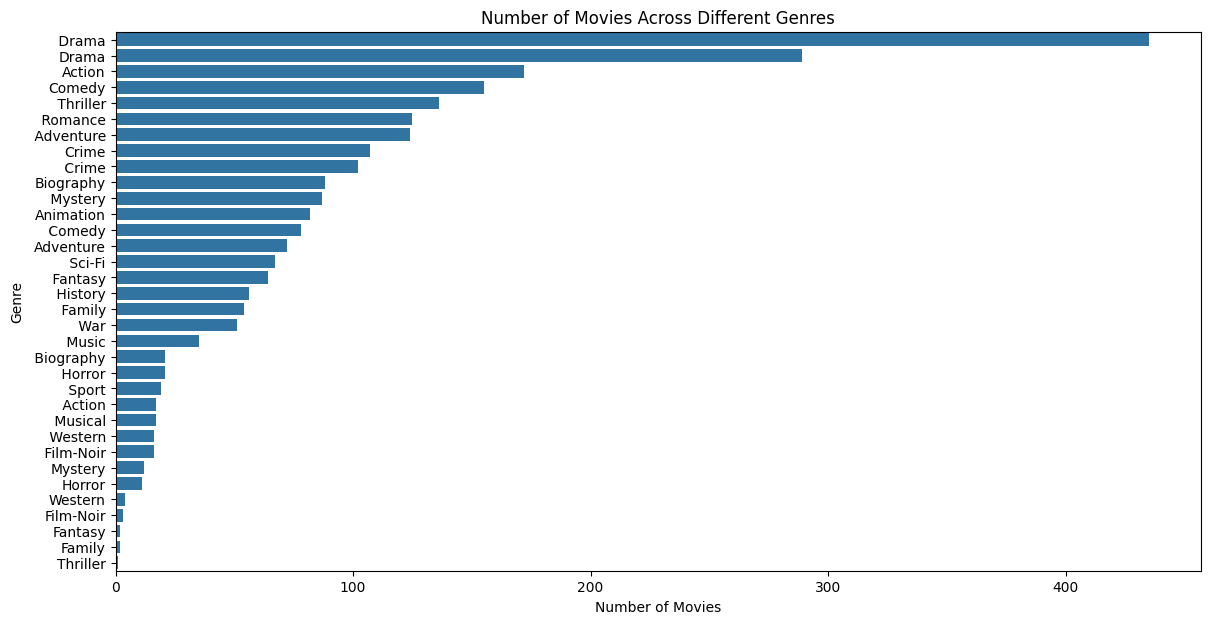

In [9]:
import seaborn as sns

genre_data = imdb_data.assign(Genre=imdb_data['Genre'].str.split(',')).explode('Genre')

plt.figure(figsize=(14, 7))
sns.countplot(y='Genre', data=genre_data, order = genre_data['Genre'].value_counts().index)
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


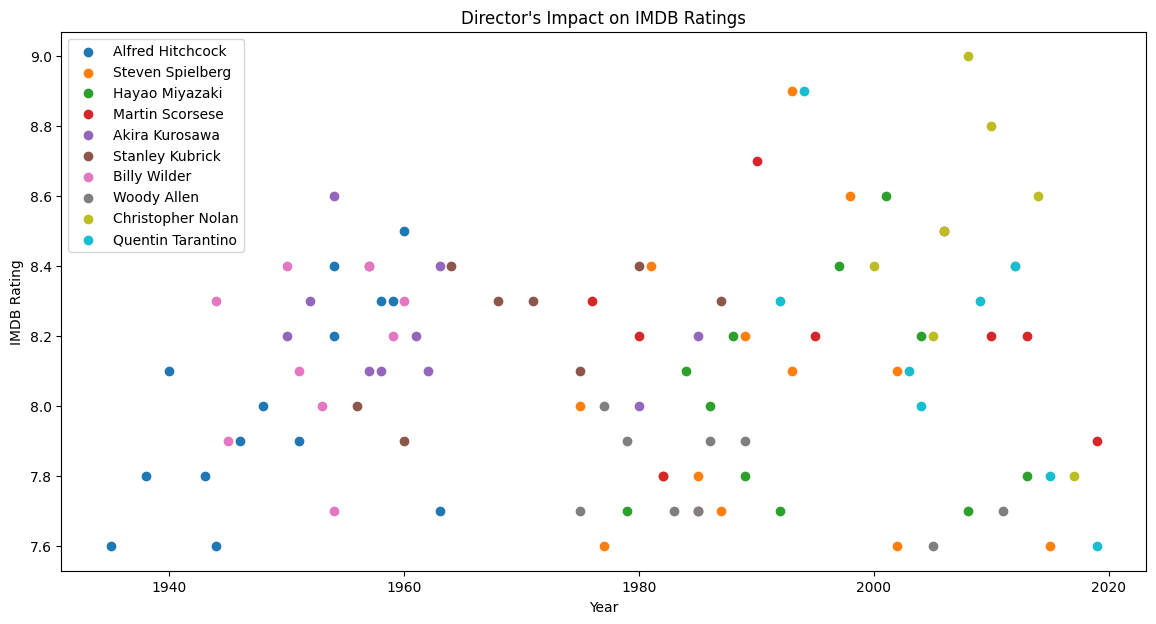

In [10]:
top_directors = imdb_data['Director'].value_counts().head(10).index
top_directors_data = imdb_data[imdb_data['Director'].isin(top_directors)]

plt.figure(figsize=(14, 7))
for director in top_directors:
    director_data = top_directors_data[top_directors_data['Director'] == director]
    plt.scatter(director_data['Released_Year'], director_data['IMDB_Rating'], label=director)

plt.title("Director's Impact on IMDB Ratings")
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.legend()
plt.show()


In [12]:
import seaborn as sns

print(imdb_data.columns)

if 'Stars' in imdb_data.columns:
    stars_data = imdb_data.assign(Stars=imdb_data['Stars'].str.split(',')).explode('Stars')
    top_stars = stars_data['Stars'].value_counts().head(10).index
    top_stars_data = stars_data[stars_data['Stars'].isin(top_stars)]
    sns.pairplot(top_stars_data, hue='Stars', vars=['IMDB_Rating', 'Gross'], palette='bright')
    plt.show()
else:
    print("Warning: 'Stars' column is missing from the dataset.")


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


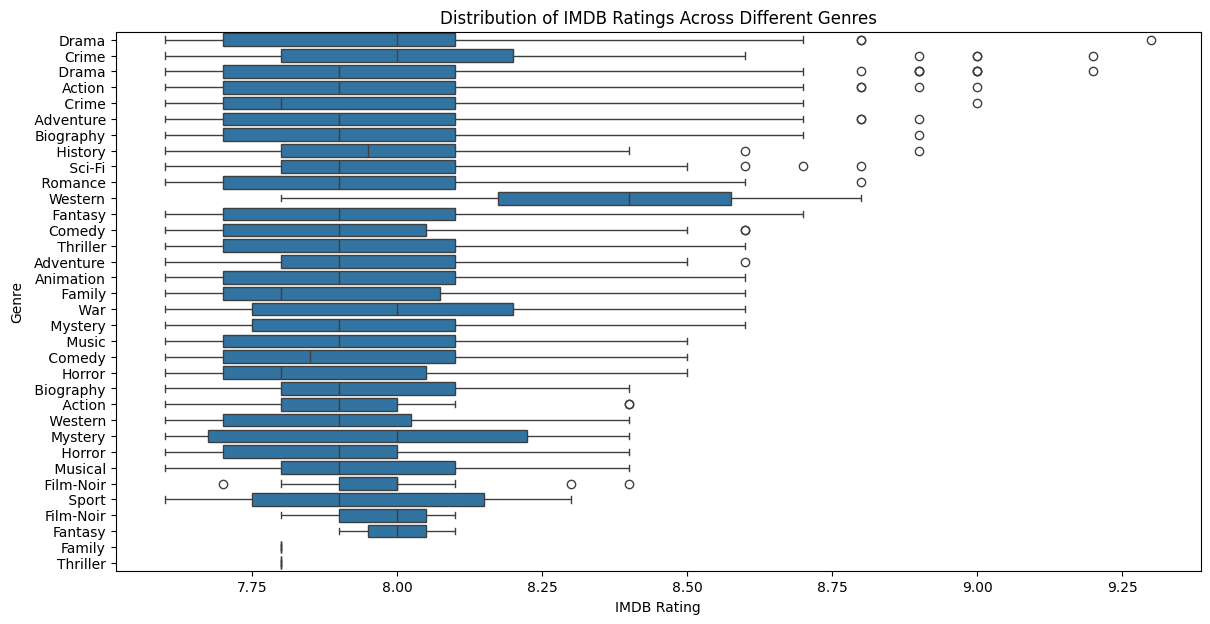

In [13]:
plt.figure(figsize=(14, 7))
sns.boxplot(y='Genre', x='IMDB_Rating', data=genre_data)
plt.title('Distribution of IMDB Ratings Across Different Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.show()


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


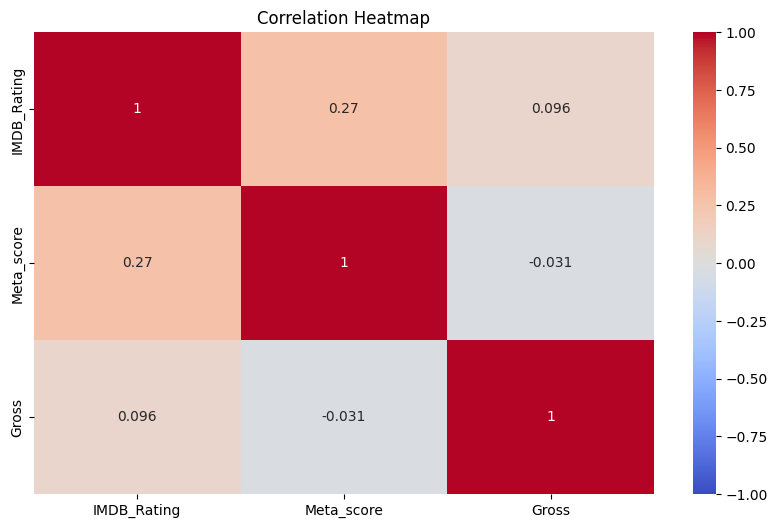

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

print(imdb_data.columns)
numerical_columns = ['IMDB_Rating', 'Meta_score', 'No_of_votes', 'Gross']
numerical_data = imdb_data[[col for col in numerical_columns if col in imdb_data.columns]]
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
